# Setting up Mario

In [7]:
pip install gym_super_mario_bros==7.3.0 nes_py

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing Super Mario Bros 
import gym_super_mario_bros
# Import the Joypad wrapepr 
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls for the game 
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Game Set Up 
# SIMPLE_MOVEMENT  simplifies the movement for mario to use. 7 basic movements 
env = gym_super_mario_bros.make("SuperMarioBros-v0")
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env.action_space

Discrete(7)

In [3]:
state = env.reset()

In [11]:
done = True 
# Looping through each step of the game 
for step in range(1000):
    # Start the game
    if done:
        env.reset()
     # Do random actions    
    state,reward,done,info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game 
env.close()

2022-03-11 16:48:37.132 python[88385:3189484] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa5a87b93d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-11 16:48:37.133 python[88385:3189484] Warning: Expected min height of view: (<NSButton: 0x7fa5a9854c50>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-11 16:48:37.136 python[88385:3189484] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa5a9855420>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-11 16:48:37.138 python[88385:3189484] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa5a9837cb0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
/Users/lamaemaharaj/opt/ana

# Preprocess Environment

In [12]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install stable-baselines3

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install opencv-python

     |████████████████████████████████| 46.3 MB 3.0 MB/s eta 0:00:012     |█████████████████████████       | 36.0 MB 6.3 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Gray Scaling & Frame Stacking 
from gym.wrappers import GrayScaleObservation 
# Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Importing Matplotlib for visualization for FrameStacking Impact
from matplotlib import pyplot as plt
import cv2

In [8]:
# Creating the base envorinment 
env = gym_super_mario_bros.make("SuperMarioBros-v0")
# Control Simplifications 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# Grayscaling 
env = GrayScaleObservation(env,keep_dim=True)
# Wrapping inside the dummy envorinment 
env = DummyVecEnv([lambda:env])
# Stacking the frames
env = VecFrameStack(env,4,channels_order='last')

In [36]:
state, reward, done, info = env.step([env.action_space.sample()])

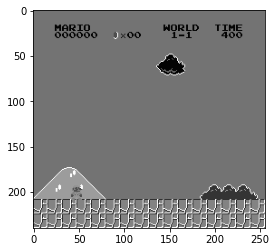

In [30]:
# Visualizing the Game Frame with color 
# Creating a black & white visual it will allow the model to learn much faster 
state = env.reset()
plt.imshow(state[0])

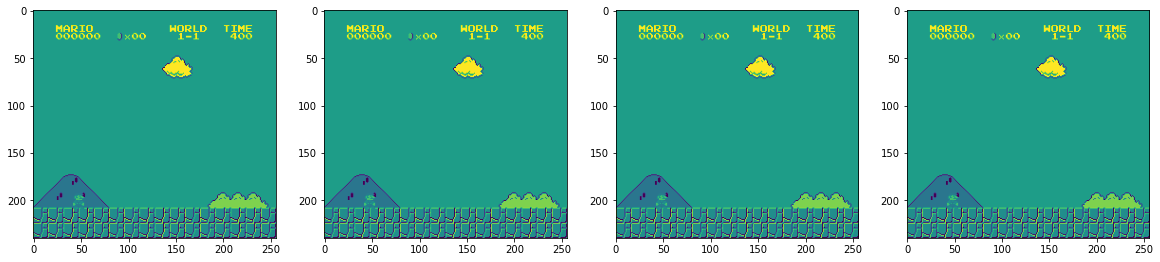

In [39]:
plt.figure(figsize=(20,10))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

#  Train the RL Model

In [38]:
# Importing the dependencies for the RL Model 
# Importing os for file path management
import os 
# import PPO for the algorithms 
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [43]:
# Every model is saved after a certain amount of steps 
# Optional but not needed! 

class TrainandLogCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [54]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'
callback = TrainandLogCallback(check_freq=1000,save_path=CHECKPOINT_DIR)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [51]:
# Setting up the model for playing the game 
model = PPO('CnnPolicy',env,verbose=1,
            tensorboard_log=LOG_DIR,
            learning_rate=0.000001,n_steps=512)


Using cpu device
Wrapping the env in a VecTransposeImage.


In [53]:
# Training the Model 
model.learn(total_timesteps=100000)

Logging to ./logs/PPO_1


/Users/lamaemaharaj/opt/anaconda3/lib/python3.8/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 20  |
|    iterations      | 1   |
|    time_elapsed    | 25  |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 8            |
|    iterations           | 2            |
|    time_elapsed         | 117          |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 9.367359e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.00636      |
|    learning_rate        | 1e-06        |
|    loss                 | 156          |
|    n_updates            | 10           |
|    policy_gradient_loss | 5.93e-05     |
|    value_loss           | 411          |
------------------------------------------
-----------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 13            |
|    time_elapsed         | 1065          |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 3.0297786e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.0113        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0753        |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000444     |
|    value_loss           | 0.216         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 14            |
|    time_elapsed         | 1150

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 24            |
|    time_elapsed         | 1985          |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 4.7813985e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.00212       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.23          |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.000682     |
|    value_loss           | 0.762         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 25           |
|    time_elapsed         | 2069    

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 35           |
|    time_elapsed         | 2903         |
|    total_timesteps      | 17920        |
| train/                  |              |
|    approx_kl            | 6.891438e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | -0.0104      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0942       |
|    n_updates            | 340          |
|    policy_gradient_loss | 2.67e-05     |
|    value_loss           | 0.403        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 36            |
|    time_elapsed         | 2987          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 46           |
|    time_elapsed         | 3823         |
|    total_timesteps      | 23552        |
| train/                  |              |
|    approx_kl            | 7.881131e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | -0.0114      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0795       |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.000609    |
|    value_loss           | 0.148        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 47            |
|    time_elapsed         | 3906          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 57            |
|    time_elapsed         | 4733          |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 0.00013369625 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | -0.0281       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0813        |
|    n_updates            | 560           |
|    policy_gradient_loss | -0.00103      |
|    value_loss           | 0.173         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 58           |
|    time_elapsed         | 4815    

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 68            |
|    time_elapsed         | 5660          |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 0.00014081527 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | 0.065         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.149         |
|    n_updates            | 670           |
|    policy_gradient_loss | -0.00106      |
|    value_loss           | 0.376         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 69            |
|    time_elapsed         | 5744

-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 79            |
|    time_elapsed         | 6775          |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 3.0364492e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.0223       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0469        |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.000153     |
|    value_loss           | 0.225         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 80            |
|    time_elapsed         | 6892

-----------------------------------------
| time/                   |             |
|    fps                  | 5           |
|    iterations           | 90          |
|    time_elapsed         | 7848        |
|    total_timesteps      | 46080       |
| train/                  |             |
|    approx_kl            | 8.94214e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.89       |
|    explained_variance   | 0.346       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0681      |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.000436   |
|    value_loss           | 0.248       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 91            |
|    time_elapsed         | 7931          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 5            |
|    iterations           | 101          |
|    time_elapsed         | 8919         |
|    total_timesteps      | 51712        |
| train/                  |              |
|    approx_kl            | 0.0002167935 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | -0.0159      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0354       |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.00098     |
|    value_loss           | 0.602        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 102           |
|    time_elapsed         | 9040          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 112          |
|    time_elapsed         | 12240        |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0002721717 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | 0.107        |
|    learning_rate        | 1e-06        |
|    loss                 | 216          |
|    n_updates            | 1110         |
|    policy_gradient_loss | 0.000297     |
|    value_loss           | 423          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 113           |
|    time_elapsed         | 12324         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 123          |
|    time_elapsed         | 13262        |
|    total_timesteps      | 62976        |
| train/                  |              |
|    approx_kl            | 0.0001821398 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.0022       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0462       |
|    n_updates            | 1220         |
|    policy_gradient_loss | -0.000732    |
|    value_loss           | 0.168        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 124          |
|    time_elapsed         | 13347        |
|    total_

--------------------------------------------
| time/                   |                |
|    fps                  | 4              |
|    iterations           | 134            |
|    time_elapsed         | 14194          |
|    total_timesteps      | 68608          |
| train/                  |                |
|    approx_kl            | 0.000100589124 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.84          |
|    explained_variance   | 0.15           |
|    learning_rate        | 1e-06          |
|    loss                 | 38             |
|    n_updates            | 1330           |
|    policy_gradient_loss | -0.000647      |
|    value_loss           | 86.6           |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 135          |
|    time_elapsed 

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 145           |
|    time_elapsed         | 15128         |
|    total_timesteps      | 74240         |
| train/                  |               |
|    approx_kl            | 8.9755864e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | -0.00832      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.324         |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.000149     |
|    value_loss           | 1.76          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 146           |
|    time_elapsed         | 1521

-------------------------------------------
| time/                   |               |
|    fps                  | 4             |
|    iterations           | 156           |
|    time_elapsed         | 16062         |
|    total_timesteps      | 79872         |
| train/                  |               |
|    approx_kl            | 0.00012800586 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | 0.753         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0826        |
|    n_updates            | 1550          |
|    policy_gradient_loss | -0.000594     |
|    value_loss           | 0.208         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 157          |
|    time_elapsed         | 16148   

-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 167           |
|    time_elapsed         | 16990         |
|    total_timesteps      | 85504         |
| train/                  |               |
|    approx_kl            | 0.00030972855 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | 0.00464       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.085         |
|    n_updates            | 1660          |
|    policy_gradient_loss | -0.000718     |
|    value_loss           | 0.693         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 168           |
|    time_elapsed         | 1707

-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 178           |
|    time_elapsed         | 18136         |
|    total_timesteps      | 91136         |
| train/                  |               |
|    approx_kl            | 0.00031929102 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | 0.0439        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.238         |
|    n_updates            | 1770          |
|    policy_gradient_loss | -0.000642     |
|    value_loss           | 4.39          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 179           |
|    time_elapsed         | 1821

------------------------------------------
| time/                   |              |
|    fps                  | 5            |
|    iterations           | 189          |
|    time_elapsed         | 19083        |
|    total_timesteps      | 96768        |
| train/                  |              |
|    approx_kl            | 8.167559e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | 0.0211       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0485       |
|    n_updates            | 1880         |
|    policy_gradient_loss | 5.95e-05     |
|    value_loss           | 0.547        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 190           |
|    time_elapsed         | 19177         |
|    t

In [55]:
model.save('Model')

# Test out Mario !

In [57]:
state = env.reset()

In [ ]:
state = env.reset()
while True:
    action,_= model.predict(state)
    state,reward,done,info = env.step(action)
    env.render()

In [ ]:
env.close()